In [24]:
import os #to interact to the file system
import numpy as np #Statistics
import pandas as pd #Database Technology <-> Data preproc & Data Analysis
from matplotlib import pyplot as plt #Visualization
import seaborn as sns #Visualization
import missingno as msno
import random 
from sklearn.preprocessing import RobustScaler #scikit-learn -> ML
import OurFunctions as of #saperated collection

In [25]:
ASD_phenotypic_original = pd.read_csv(os.path.join('DataSets','Phenotypic Datasets','ASD_phenotypic.csv'))

# DATA EXPLORATION

Visualization of the overall dataset

In [26]:
ASD_phenotypic_original

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
0,CALTECH,51456,1,4,55.40,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CALTECH,51457,1,4,22.90,1,Ambi,NaN,107.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,CALTECH,51458,1,1,39.20,1,R,NaN,93.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CALTECH,51459,1,1,22.80,1,R,NaN,106.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CALTECH,51460,1,1,34.60,2,Ambi,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,YALE,50624,1,3,11.08,2,R,NaN,90.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1108,YALE,50625,1,3,7.00,1,L,NaN,99.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1109,YALE,50626,1,3,11.08,1,L,NaN,61.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1110,YALE,50627,1,3,9.50,2,R,NaN,88.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


The dataset contains 1112 subjects and has 74 features.

 By a fast view we can see that there are both categorical and numerical values and there are missing values. Also, we can see the presence of the categories DX_GROUP and DSM_IV_TR, that are described from the ABIDE dataset legend as diagnostic, so we will further remove them from the dataset for the model predictor construction. We can also think about delete the feature EYE_STATUS_AT_SCAN, because it's informing about the fact the eyes of the subject were open or not during the fMRI, so it's not relevant information for us in this moment.

DX_GROUP and DSM_IV_TR are our targets.
DX_GROUP contains info about the presence (or not) of autism spectrum.
DSM_IV_TR specifyes which kind of autism. 
However, in our investigation, we are interested only on evaluate the presence or not of the disease, so we will not consider the information in DSM_IV_TR.

To know if the dataset is balanced we plot the distribution of the unique values in DX_GROUP, that correspond to the labels.

In order to understand the balancing of our dataset, we check the target feature: 'DX_GROUP'. 

1 | Controls

2 | Autism detected

Conteggio delle classi per DX_GROUP:
DX_GROUP
2    573
1    539
Name: count, dtype: int64


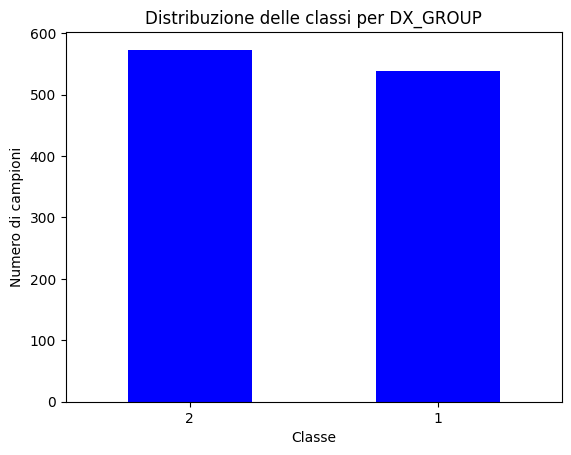


Proporzioni delle classi per DX_GROUP:
DX_GROUP
2    0.515288
1    0.484712
Name: proportion, dtype: float64


In [27]:
of.evaluate_balancing(ASD_phenotypic_original)

DX_GROUP is balanced.

Now, to have a better view of the information contained in the dataset we display the names of the features and the respective types and quantity of non-null values.

In [28]:
ASD_phenotypic_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SITE_ID                          1112 non-null   object 
 1   SUB_ID                           1112 non-null   int64  
 2   DX_GROUP                         1112 non-null   int64  
 3   DSM_IV_TR                        1112 non-null   int64  
 4   AGE_AT_SCAN                      1112 non-null   float64
 5   SEX                              1112 non-null   int64  
 6   HANDEDNESS_CATEGORY              797 non-null    object 
 7   HANDEDNESS_SCORES                370 non-null    float64
 8   FIQ                              1077 non-null   float64
 9   VIQ                              935 non-null    float64
 10  PIQ                              953 non-null    float64
 11  FIQ_TEST_TYPE                    947 non-null    object 
 12  VIQ_TEST_TYPE       

In [29]:
ASD_phenotypic_original.describe(include = 'object').T

,count,unique,top,freq
SITE_ID,1112,20,NYU,184
HANDEDNESS_CATEGORY,797,6,R,693
FIQ_TEST_TYPE,947,13,WASI,551
VIQ_TEST_TYPE,834,14,WASI,508
PIQ_TEST_TYPE,853,15,WASI,508
COMORBIDITY,64,43,ADHD Inattentive,7
CURRENT_MED_STATUS,817,4,0,673
MEDICATION_NAME,157,103,0,24


As we can see, there is an important presence of missing values. Also, there are both numerical type features and object type (which is the default way to label the categorical data.)

In order to have a better view of the distribution of the null values, we check the presence of missing values catalogated as None or numpy.NaN

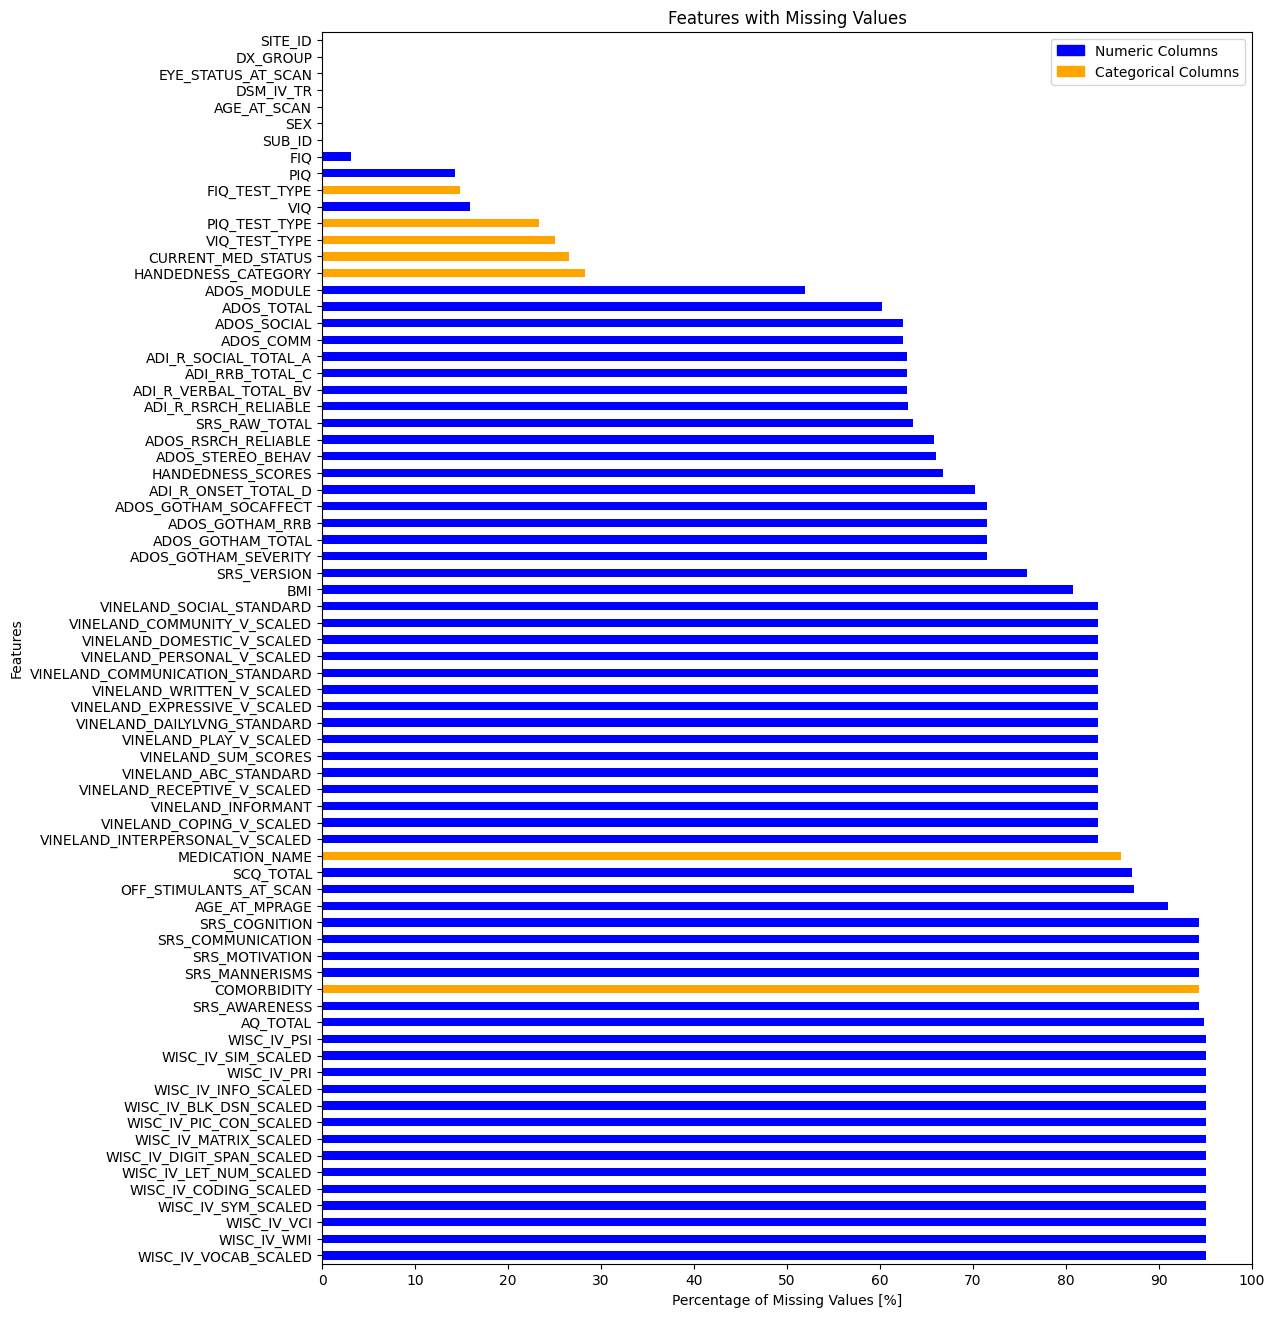

In [30]:
# Count of the missing values

nan_values = ASD_phenotypic_original.isna().sum() 
nan_sorted = nan_values.sort_values(ascending=False)

total_rows = ASD_phenotypic_original.shape[0]
percent_missing = (nan_sorted / total_rows) * 100

# We implemented a function "select_columns", that is able to define wich columns are numerical
# and which ones are categorical (also redefine the objects as categorical in the dataset)
numeric_columns, categorical_columns, ASD_phenotypic_original = of.select_columns(ASD_phenotypic_original)

# We plot the distribution of missing values, with the specification of numeric and categorical columns
of.plot_missing_values(percent_missing, numeric_columns, legend=True)



For the majority of the features the amount of missing values is not depreciable, so we can say that the information that is stored in the feature is not enough to create a reliable classier/cluster algortihm based on it. The same comment can be done for the subjects. We need to work on a dataset that has a maximum of 10% of missing values per feature, so we need to clean this in some way.

Now let's have a look on the general statistics for the numerical attributes.

In [31]:
ASD_phenotypic_original.describe()

,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,ADI_R_SOCIAL_TOTAL_A,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,370.000000,1077.000000,935.000000,953.000000,412.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,1112.000000,101.000000,214.000000
mean,50752.684353,1.515288,-646.819245,17.048864,1.147482,-102.560892,-238.854968,-86.757219,-126.663169,-807.024272,...,11.636364,9.909091,11.545455,10.127273,10.363636,8.763636,9.890909,1.312050,-86.176535,-5597.902757
std,447.680666,0.499991,2461.828856,8.036419,0.354745,1273.177790,1841.858322,1389.584584,1518.469557,2760.138808,...,3.014555,3.187201,2.651472,3.232099,2.914610,2.821634,2.753266,0.463539,996.228820,4984.307763
min,50002.000000,1.000000,-9999.000000,6.470000,1.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,4.000000,3.000000,7.000000,2.000000,2.000000,4.000000,1.000000,1.000000,-9999.000000,-9999.000000
25%,50354.750000,1.000000,0.000000,11.658575,1.000000,48.000000,98.000000,97.000000,96.000000,14.000000,...,10.000000,7.000000,10.000000,7.500000,9.500000,7.000000,8.000000,1.000000,11.250000,-9999.000000
50%,50724.500000,2.000000,0.000000,14.660000,1.000000,75.000000,108.000000,108.000000,107.000000,20.000000,...,11.000000,11.000000,11.000000,10.000000,11.000000,9.000000,10.000000,1.000000,12.900000,-9999.000000
75%,51153.250000,2.000000,1.000000,20.085000,1.000000,91.000000,119.000000,119.000000,117.000000,24.000000,...,13.000000,12.000000,12.500000,12.500000,12.000000,10.500000,12.000000,2.000000,14.440000,18.817500
max,51607.000000,2.000000,4.000000,64.000000,2.000000,100.000000,148.000000,180.000000,157.000000,30.000000,...,19.000000,15.000000,19.000000,17.000000,14.000000,15.000000,16.000000,2.000000,17.940000,35.430000


We can notice the presence of "-9999" as minimum value for different features, a value that is commonly used to denote missing data or values out of range, so it should be better to consider them as NaN.

Now that we have an overall view of the dataset, let's start to work on it in order to clean it.

# DATA CLEANING

First of all, we decided to apart the features that give the diagnosis of the subjects (DX_GROUP and DSM_IV_TR), in order to use them as the control labels. 

We also drop EYE_STATUS_AT_SCAN, that it's not relevant feature for this analysis.

In [32]:


ASD_phenotypic = ASD_phenotypic_original.drop(columns=['DSM_IV_TR','EYE_STATUS_AT_SCAN'])



Also we decide to drop SUB_ID, as it only store the information about the ID of the subject. But before we check if there aren't replicated subjects. Then if we don't find any duplicate, we can simply drop the column.

In [33]:
# Check if there are duplicate values in the 'SUB_ID' column
duplicate_ids = ASD_phenotypic['SUB_ID'].duplicated(keep=False)

# Get the unique duplicate IDs
unique_duplicate_ids = ASD_phenotypic.loc[duplicate_ids, 'SUB_ID'].unique()

#Drop column if there aren't duplicates
if len(unique_duplicate_ids) == 0:
    ASD_phenotypic = ASD_phenotypic.drop(columns=['SUB_ID'])
    print("SUB_ID was dropped")
else:
    print("There are replicated values:" + str(unique_duplicate_ids))
    

SUB_ID was dropped


In order to have a real count of the amount of missing values per feature, we change the -9999 values present in the overall data to np.NaN (we can make this because we know from the datasheets that -9999 is a value out of range for all the features).

In [34]:
for column in ASD_phenotypic:
    
    # Replace -9999 and "-9999" with NaN
    ASD_phenotypic[column] = ASD_phenotypic[column].replace(['-9999', -9999], np.NaN)
    

C:\Users\auran\AppData\Local\Temp\ipykernel_9756\1707501323.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ASD_phenotypic[column] = ASD_phenotypic[column].replace(['-9999', -9999], np.NaN)


We also notice that there are two features that indicates if the personal that took the tests is a trained professional or not (ADI_R_RSRCH_RELIABLE and ADOS_RSRCH_RELIABLE ). This is information is interesting to determine if the scores achieved in the respective tests are reliable or not. In order to avoid include not reliable information, we decide to eliminate the subjects that has a 0 in both categories (not reliable), while if the value is 1 or missed, we maintain the subject.

In [35]:
# Create a mask for rows to keep
filter = (ASD_phenotypic['ADI_R_RSRCH_RELIABLE'] != 0) | (ASD_phenotypic['ADOS_RSRCH_RELIABLE'] != 0)

# Calculate the number of subjects to delete
deleted_subjects = len(ASD_phenotypic) - filter.sum()

# Apply the mask to both DataFrames
ASD_phenotypic= ASD_phenotypic[filter]

# Print the number of subjects deleted
print("Number of subjects deleted:", deleted_subjects)

ASD_phenotypic = ASD_phenotypic.drop(columns=['ADI_R_RSRCH_RELIABLE','ADOS_RSRCH_RELIABLE'])

Number of subjects deleted: 26


In [36]:
ASD_phenotypic

,SITE_ID,DX_GROUP,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,...,WISC_IV_INFO_SCALED,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,AGE_AT_MPRAGE,BMI
0,CALTECH,1,55.40,1,R,NaN,126.0,118.0,128.0,WASI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CALTECH,1,22.90,1,Ambi,NaN,107.0,119.0,93.0,WASI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CALTECH,1,39.20,1,R,NaN,93.0,80.0,108.0,WASI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CALTECH,1,22.80,1,R,NaN,106.0,94.0,118.0,WASI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CALTECH,1,34.60,2,Ambi,NaN,133.0,135.0,122.0,WASI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,YALE,1,11.08,2,R,NaN,90.0,91.0,89.0,DAS_II_SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,YALE,1,7.00,1,L,NaN,99.0,90.0,98.0,DAS_II_SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,YALE,1,11.08,1,L,NaN,61.0,66.0,60.0,DAS_II_SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,YALE,1,9.50,2,R,NaN,88.0,103.0,84.0,DAS_II_SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to clean our starting dataset:

- displaying the distribution of missing values
- menaging our dataset with the purpose to achieve at a cleaned one with teo conditions:
    
    - 10 % of NaN per feature
    - at least 1/4 of subjects involved
    - balancing of dataset (max 60/40 %)

<Axes: >

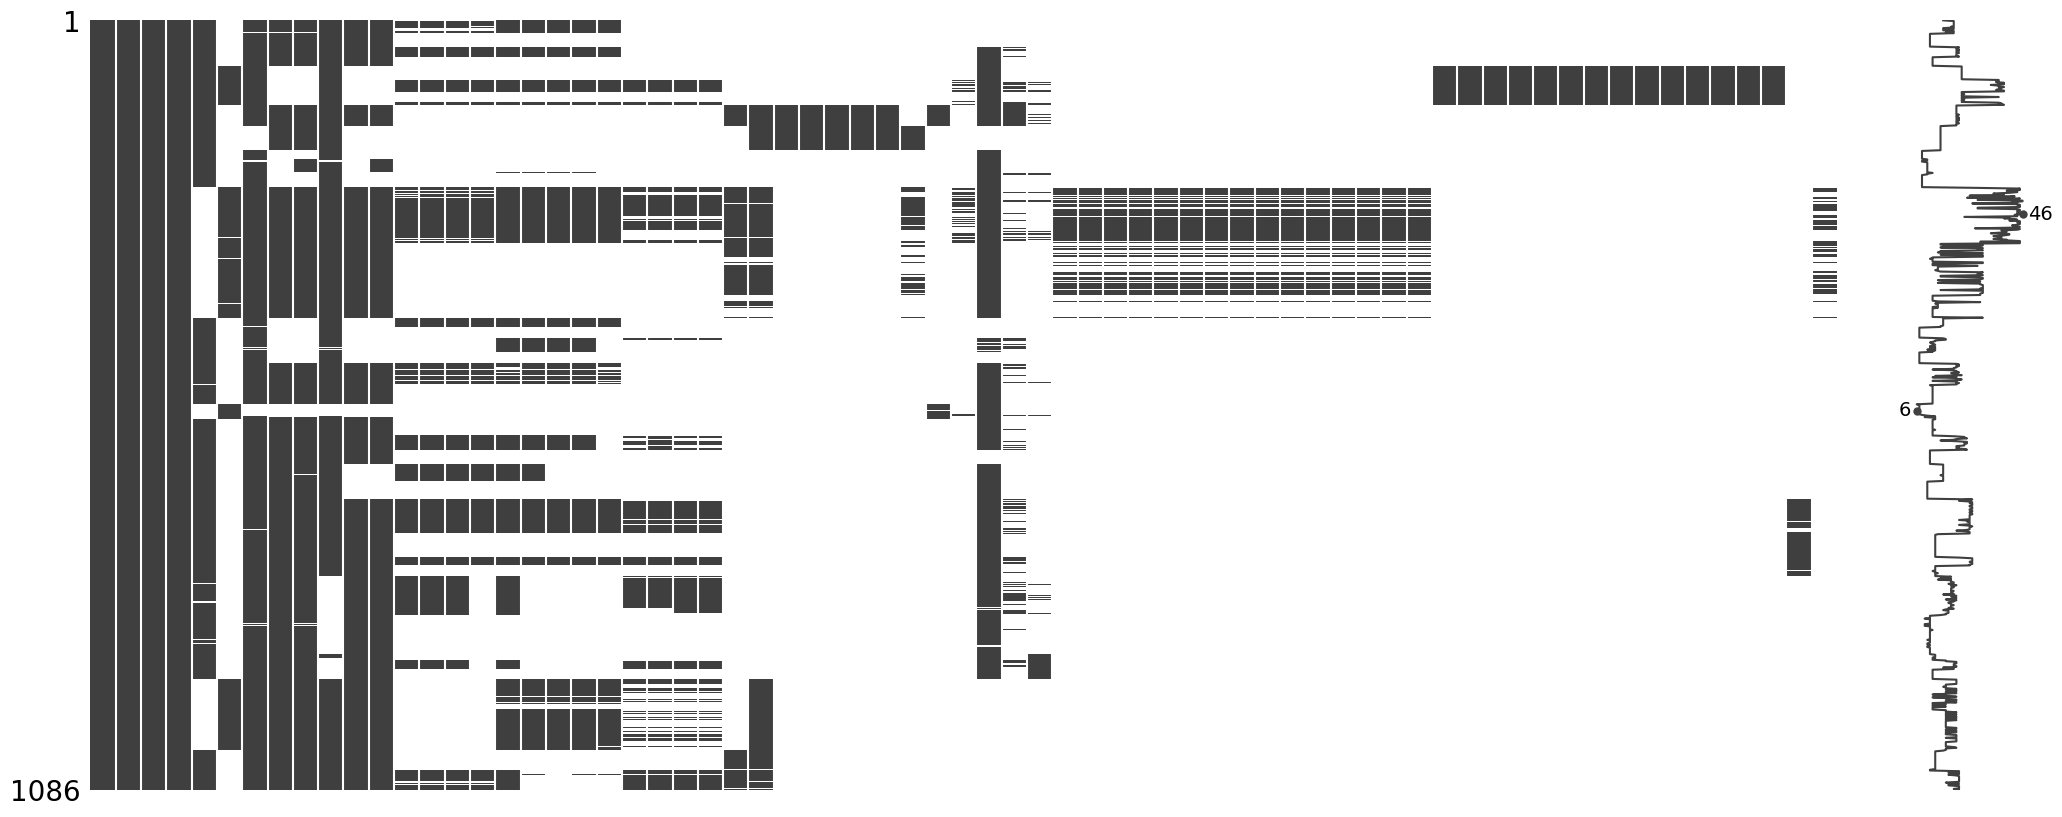

In [37]:


#Visualizzazione dei missing values
msno.matrix(ASD_phenotypic)

According to our aim, following the pipeline of reference paper, we create an alghoritm with boundary contitions already mentioned. Moreover, we force the presence of key features.  

In [38]:

# Features chiave da mantenere
key_features = ['FIQ', 'VIQ', 'PIQ', 'ADI_R_VERBAL_TOTAL_BV', 'ADOS_TOTAL']

def remove_high_missing(df, key_features, balance_column, min_subjects=200, max_missing_percentage=10):
    current_df = df.copy()
    
    # Calcolare la proporzione iniziale del bilanciamento
    initial_balance = current_df[balance_column].value_counts(normalize=True)
    
    while (of.calculate_missing_percentage(current_df) > max_missing_percentage): 
        # Calcola la percentuale di valori mancanti per ciascuna colonna e riga
        missing_percent_features = current_df.isna().mean() * 100
        missing_percent_subjects = current_df.isna().mean(axis=1) * 100
        
        # Filtra le features chiave per non rimuoverle
        non_key_features = missing_percent_features.drop(labels=key_features, errors='ignore')
        
        # Trova la feature o il soggetto con il più alto tasso di missing values
        max_feature_missing = non_key_features.max()
        max_subject_missing = missing_percent_subjects.max()
        
        # Rimuovi la feature o il soggetto con il tasso di missing values più alto
        if max_feature_missing >= max_subject_missing and not non_key_features.empty:
            feature_to_drop = non_key_features.idxmax()
            current_df = current_df.drop(columns=[feature_to_drop])
            print(f"Rimosso feature: {feature_to_drop}")
        elif not missing_percent_subjects.empty:
            scelto_soggetto = False
            while not scelto_soggetto:
                subject_to_drop = missing_percent_subjects.idxmax()
                temp_df = current_df.drop(index=[subject_to_drop])
            
             # Verifica il bilanciamento dopo la rimozione
                current_balance = temp_df[balance_column].value_counts(normalize=True)
                if all(abs(initial_balance - current_balance) <= 0.2):  # Assicurarsi che il bilanciamento non cambi di più del 20%
                    current_df = temp_df
                    scelto_soggetto = True
                    print(f"Rimosso soggetto: {subject_to_drop}")
                else:
                    id = missing_percent_subjects.drop(subject_to_drop)
                    print(f"Soggetto non rimosso per mantenere il bilanciamento: {subject_to_drop}")
            

        # Controllo dello stato attuale del DataFrame
        print(f"Percentuale attuale di missing values: {of.calculate_missing_percentage(current_df):.2f}%")
        if current_df.shape[0] > min_subjects:
            print(f"Numero di soggetti rimanenti: {current_df.shape[0]}")
    
    return current_df


# Applica la funzione di pulizia sul DataFrame
ASD_phenotypic_cleaned = remove_high_missing(ASD_phenotypic, key_features, balance_column='DX_GROUP', min_subjects=200, max_missing_percentage=10)

# Mostra DataFrame pulito
ASD_phenotypic_cleaned


Rimosso feature: AQ_TOTAL
Percentuale attuale di missing values: 73.00%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_VCI
Percentuale attuale di missing values: 72.67%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_PRI
Percentuale attuale di missing values: 72.33%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_WMI
Percentuale attuale di missing values: 71.99%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_PSI
Percentuale attuale di missing values: 71.63%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_SIM_SCALED
Percentuale attuale di missing values: 71.26%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_VOCAB_SCALED
Percentuale attuale di missing values: 70.88%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_INFO_SCALED
Percentuale attuale di missing values: 70.48%
Numero di soggetti rimanenti: 1086
Rimosso feature: WISC_IV_BLK_DSN_SCALED
Percentuale attuale di missing values: 70.07%
Numero di sog

,SITE_ID,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL
0,CALTECH,1,55.40,1,126.0,118.0,128.0,WASI,WASI,WASI,NaN,9.0
1,CALTECH,1,22.90,1,107.0,119.0,93.0,WASI,WASI,WASI,17.0,8.0
2,CALTECH,1,39.20,1,93.0,80.0,108.0,WASI,WASI,WASI,18.0,20.0
3,CALTECH,1,22.80,1,106.0,94.0,118.0,WASI,WASI,WASI,12.0,12.0
4,CALTECH,1,34.60,2,133.0,135.0,122.0,WASI,WASI,WASI,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,YALE,1,11.08,2,90.0,91.0,89.0,DAS_II_SA,DAS_II_SA,DAS_II_SA,10.0,NaN
1108,YALE,1,7.00,1,99.0,90.0,98.0,DAS_II_SA,DAS_II_SA,DAS_II_SA,23.0,NaN
1109,YALE,1,11.08,1,61.0,66.0,60.0,DAS_II_SA,DAS_II_SA,DAS_II_SA,24.0,NaN
1110,YALE,1,9.50,2,88.0,103.0,84.0,DAS_II_SA,DAS_II_SA,DAS_II_SA,11.0,NaN


Checking Missin Values for features and subjects

In [39]:
ASD_phenotypic_cleaned.isna().sum()


SITE_ID                    0
DX_GROUP                   0
AGE_AT_SCAN                0
SEX                        0
FIQ                        1
VIQ                        0
PIQ                        0
FIQ_TEST_TYPE             66
VIQ_TEST_TYPE             23
PIQ_TEST_TYPE             23
ADI_R_VERBAL_TOTAL_BV    351
ADOS_TOTAL               337
dtype: int64

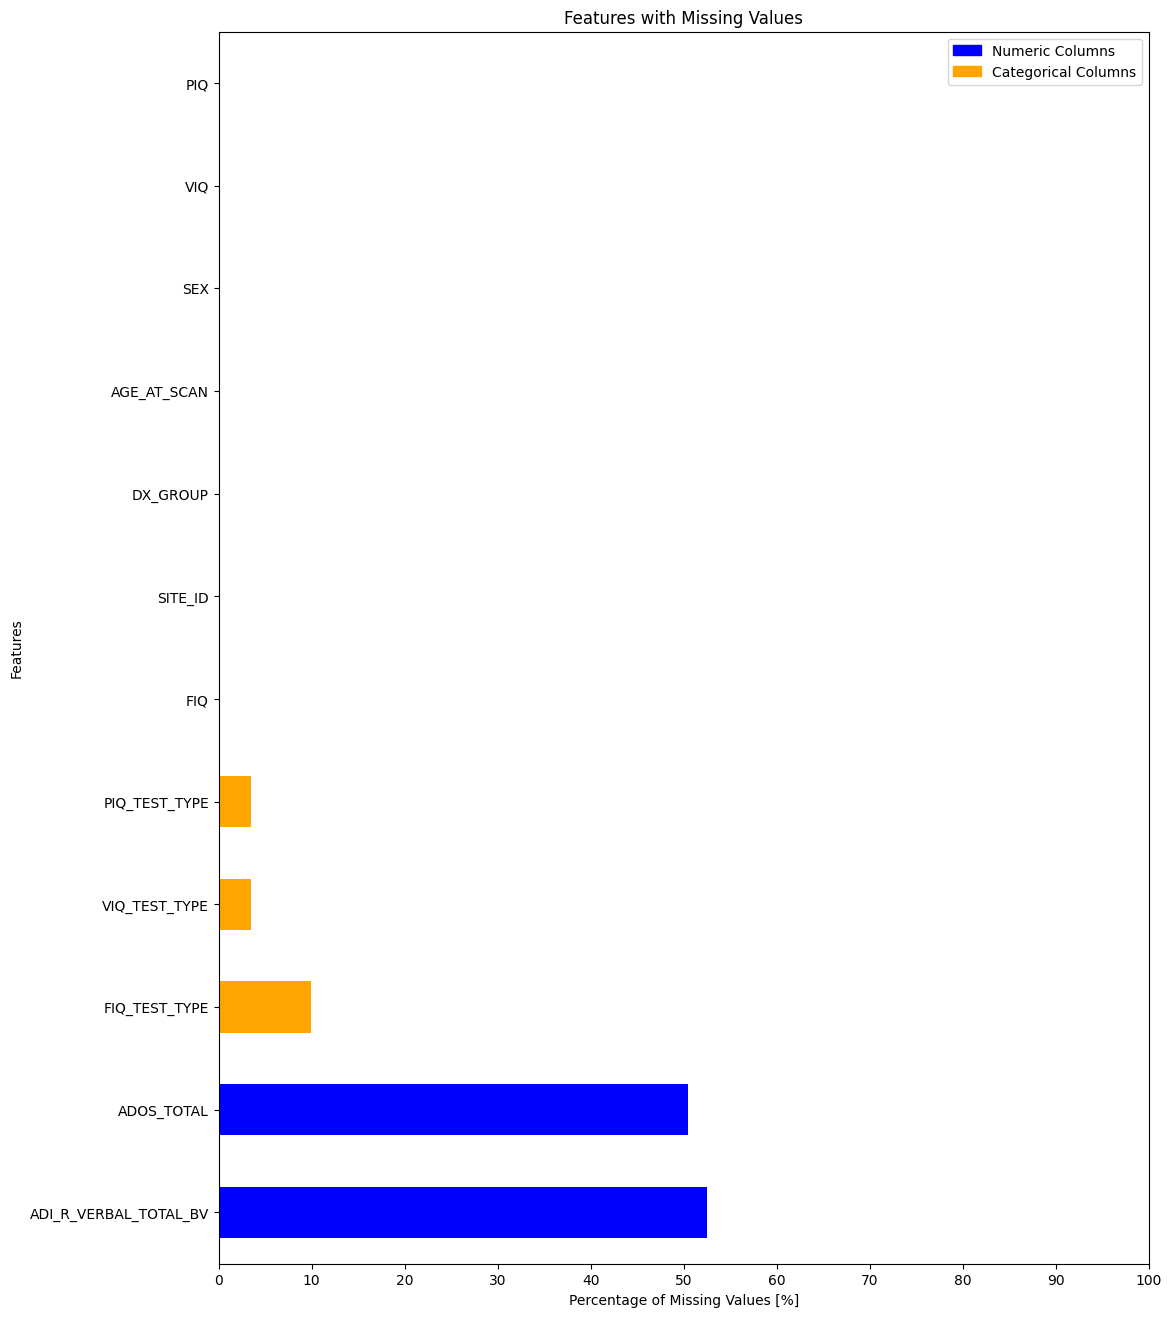

In [40]:
# Count of the missing values

nan_values = ASD_phenotypic_cleaned.isna().sum() 
nan_sorted = nan_values.sort_values(ascending=False)

total_rows = ASD_phenotypic_cleaned.shape[0]
percent_missing = (nan_sorted / total_rows) * 100

# We implemented a function "select_columns", that is able to define wich columns are numerical
# and which ones are categorical (also redefine the objects as categorical in the dataset)
numeric_columns, categorical_columns, ASD_phenotypic_cleaned = of.select_columns(ASD_phenotypic_cleaned)

# We plot the distribution of missing values, with the specification of numeric and categorical columns
of.plot_missing_values(percent_missing, numeric_columns, legend=True)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


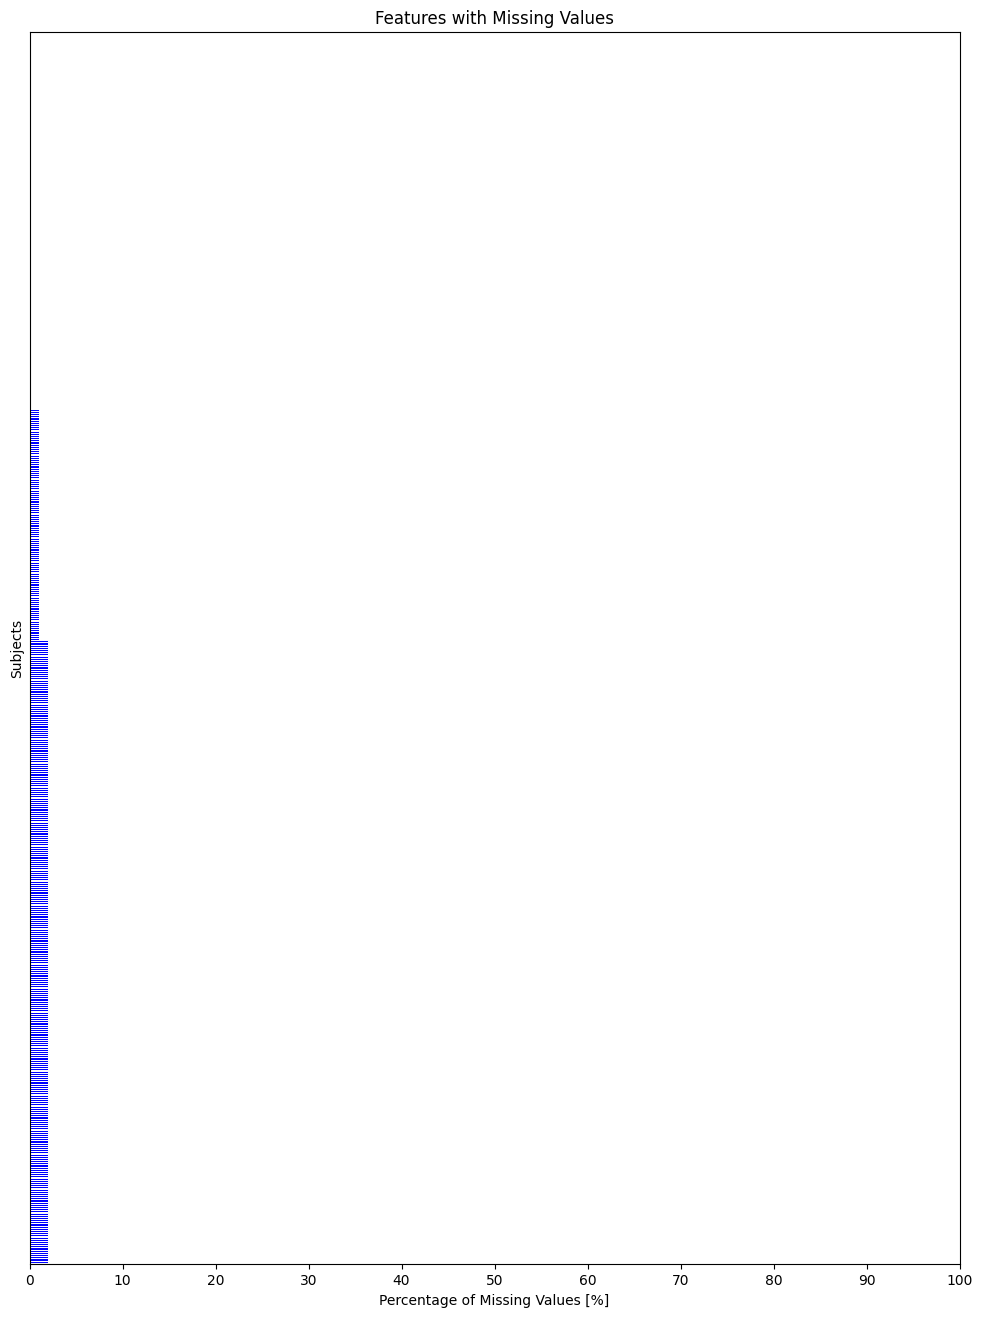

In [41]:
# Calcolo dei valori mancanti per soggetto anziché per feature
nan_values_per_subject = ASD_phenotypic_cleaned.T.isna().sum()

# Ordinamento dei valori mancanti
subjects_with_nan_sorted = nan_values_per_subject.sort_values(ascending=False)


of.plot_missing_values(subjects_with_nan_sorted, nan_values_per_subject, legend=False)
plt.ylabel('Subjects')
plt.yticks([])
plt.show()

Checking the balancing

Conteggio delle classi per DX_GROUP:
DX_GROUP
1    403
2    265
Name: count, dtype: int64


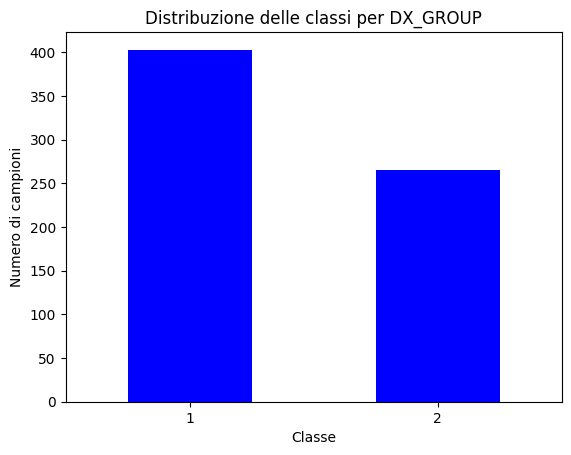


Proporzioni delle classi per DX_GROUP:
DX_GROUP
1    0.603293
2    0.396707
Name: proportion, dtype: float64


In [42]:
of.evaluate_balancing(ASD_phenotypic_cleaned)

We achieved our goal

In [43]:

# Store them in a new dataset called ASD_clinical
ASD_clinical = ASD_phenotypic_cleaned[['DX_GROUP']]
# Drop  columns DX_GROUP e fai storage a parte
ASD_phenotypic = ASD_phenotypic_cleaned.drop(columns=['DX_GROUP'])



In [44]:
ASD_phenotypic.head().T

,0,1,2,3,4
SITE_ID,CALTECH,CALTECH,CALTECH,CALTECH,CALTECH
AGE_AT_SCAN,55.4,22.9,39.2,22.8,34.6
SEX,1,1,1,1,2
FIQ,126.0,107.0,93.0,106.0,133.0
VIQ,118.0,119.0,80.0,94.0,135.0
PIQ,128.0,93.0,108.0,118.0,122.0
FIQ_TEST_TYPE,WASI,WASI,WASI,WASI,WASI
VIQ_TEST_TYPE,WASI,WASI,WASI,WASI,WASI
PIQ_TEST_TYPE,WASI,WASI,WASI,WASI,WASI
ADI_R_VERBAL_TOTAL_BV,NaN,17.0,18.0,12.0,11.0


# Data distribution

We want to check how our features are distributed, in order to know which kind of normalization of the data is more suitable and if we may need to delete some outliers during the execution of our classification pipeline.

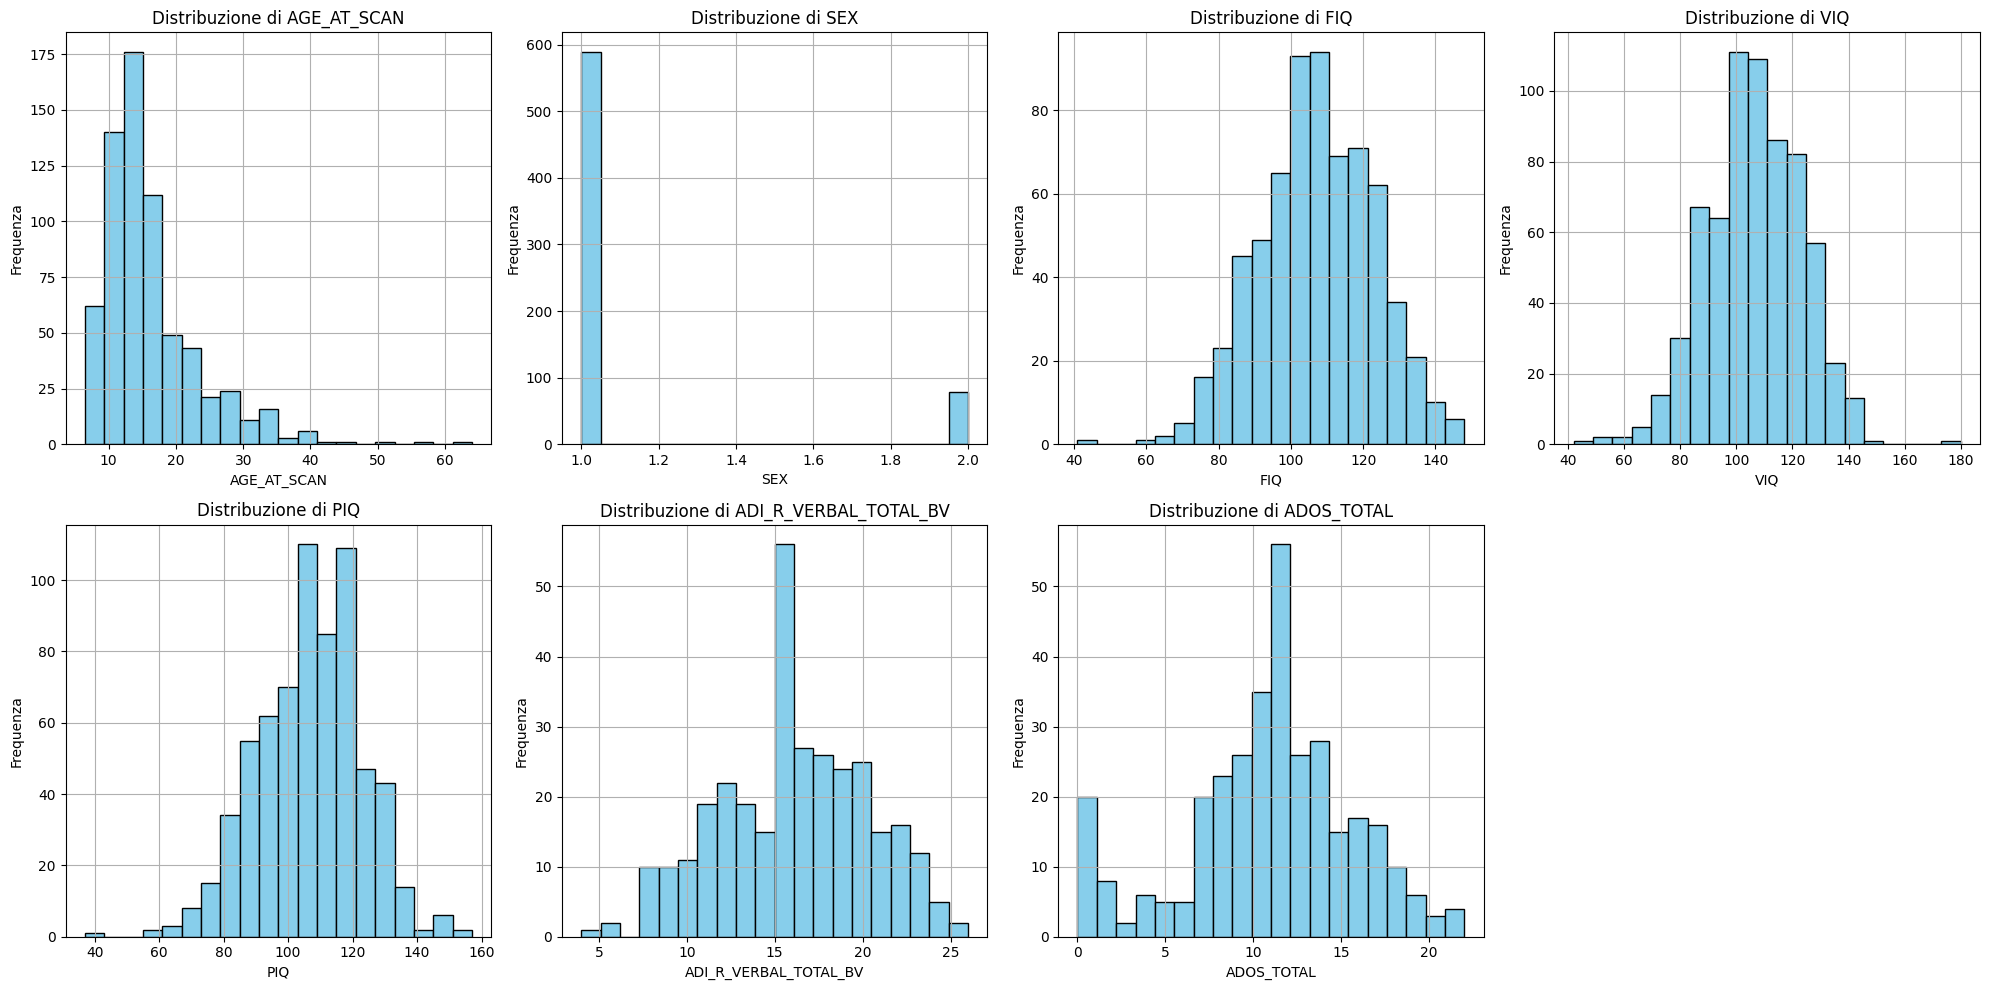

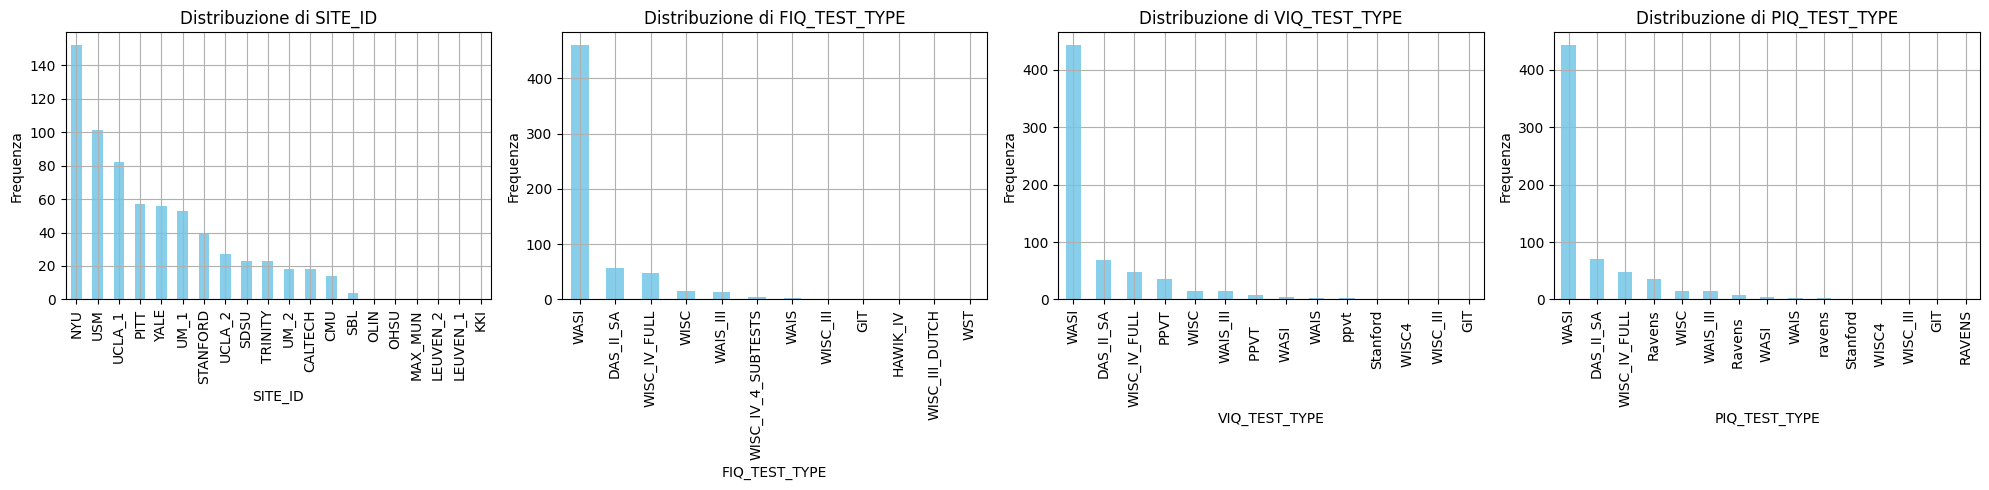

In [45]:
# Utilizzo della funzione per plottare le distribuzioni delle features
of.plot_distributions(ASD_phenotypic)

## CORRELATION ANALYSIS

We want to perform correlation analysis separatamente, per numeriche e categoriche così da eliminarne alcune. Poi o ANOVA TEST O BOX PLOT O CAPIAMO PER TROVARE EVENTUALE CORRELAZIONE TRA NUMERICHE E CATEGORICHE.

But, we need to normalize the data to make comparisons.

## Normalization

In [46]:

# Selezione delle colonne numeriche e categoriche
numeric_columns = ASD_phenotypic.select_dtypes(include=['float64', 'int64'])
categorical_columns = ASD_phenotypic.select_dtypes(include=['object', 'category'])

# Inizializzazione dello StandardScaler
scaler = RobustScaler()

# Addestramento dello scaler e trasformazione dei dati numerici
scaled_numeric_data = scaler.fit_transform(numeric_columns)

# Creazione di un nuovo DataFrame con i dati numerici normalizzati
numeric_columns_normalized = pd.DataFrame(scaled_numeric_data, columns=numeric_columns.columns, index=ASD_phenotypic.index)

# Combina i dati numerici normalizzati e i dati categorici in un unico DataFrame
ASD_phenotypic_normalized = pd.concat([numeric_columns_normalized, categorical_columns], axis=1)



In [47]:
ASD_phenotypic_normalized.describe()

,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL
count,668.000000,668.000000,667.000000,668.000000,668.000000,317.000000,331.000000
mean,0.294954,0.118263,0.004907,-0.028987,-0.032390,0.009989,-0.018630
std,1.050773,0.323162,0.722050,0.754360,0.732410,0.710447,0.793432
min,-1.139468,0.000000,-3.000000,-2.954545,-3.181818,-2.000000,-1.833333
25%,-0.380519,0.000000,-0.454545,-0.500000,-0.500000,-0.500000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.619481,0.000000,0.545455,0.500000,0.500000,0.500000,0.500000
max,7.275626,1.000000,1.863636,3.318182,2.272727,1.666667,1.833333


In [48]:
ASD_phenotypic_normalized 

,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL,SITE_ID,FIQ_TEST_TYPE,VIQ_TEST_TYPE,PIQ_TEST_TYPE
0,6.017677,0.0,0.863636,0.500000,0.954545,NaN,-0.333333,CALTECH,WASI,WASI,WASI
1,1.263800,0.0,0.000000,0.545455,-0.636364,0.166667,-0.500000,CALTECH,WASI,WASI,WASI
2,3.648052,0.0,-0.636364,-1.227273,0.045455,0.333333,1.500000,CALTECH,WASI,WASI,WASI
3,1.249173,0.0,-0.045455,-0.590909,0.500000,-0.666667,0.166667,CALTECH,WASI,WASI,WASI
4,2.975196,1.0,1.181818,1.272727,0.681818,-0.833333,0.333333,CALTECH,WASI,WASI,WASI
...,...,...,...,...,...,...,...,...,...,...,...
1107,-0.465149,1.0,-0.772727,-0.727273,-0.818182,-1.000000,NaN,YALE,DAS_II_SA,DAS_II_SA,DAS_II_SA
1108,-1.061943,0.0,-0.363636,-0.772727,-0.409091,1.166667,NaN,YALE,DAS_II_SA,DAS_II_SA,DAS_II_SA
1109,-0.465149,0.0,-2.090909,-1.863636,-2.136364,1.333333,NaN,YALE,DAS_II_SA,DAS_II_SA,DAS_II_SA
1110,-0.696260,1.0,-0.863636,-0.181818,-1.045455,-0.833333,NaN,YALE,DAS_II_SA,DAS_II_SA,DAS_II_SA


## Correlation between Numerical Features

In [49]:
numeric_normalized = ASD_phenotypic_normalized.select_dtypes(include=['float64', 'int64'])

# Calcola la correlation matrix
correlation_matrix = numeric_normalized.corr()

# Visualizza la correlation matrix
print(correlation_matrix)

                       AGE_AT_SCAN       SEX       FIQ       VIQ       PIQ  \
AGE_AT_SCAN               1.000000 -0.084471  0.077682  0.055968  0.075395   
SEX                      -0.084471  1.000000 -0.017254  0.002622 -0.033315   
FIQ                       0.077682 -0.017254  1.000000  0.860293  0.864154   
VIQ                       0.055968  0.002622  0.860293  1.000000  0.522606   
PIQ                       0.075395 -0.033315  0.864154  0.522606  1.000000   
ADI_R_VERBAL_TOTAL_BV    -0.024329 -0.033338 -0.058893 -0.047522 -0.077906   
ADOS_TOTAL                0.003235  0.024899 -0.222110 -0.264507 -0.133220   

                       ADI_R_VERBAL_TOTAL_BV  ADOS_TOTAL  
AGE_AT_SCAN                        -0.024329    0.003235  
SEX                                -0.033338    0.024899  
FIQ                                -0.058893   -0.222110  
VIQ                                -0.047522   -0.264507  
PIQ                                -0.077906   -0.133220  
ADI_R_VERBAL_TOTAL_BV

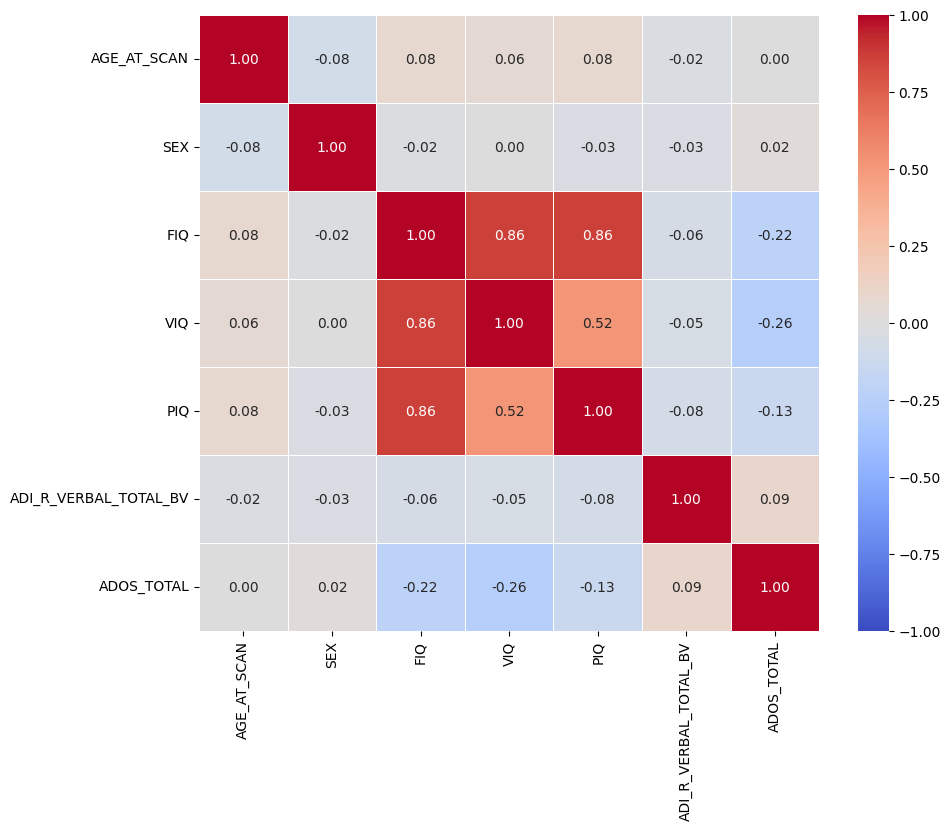

In [50]:
#CORRELATION MATRIX
# Calcola la correlazione tra le features normalizzate
correlation_matrix = numeric_normalized.corr()
numeric_normalized.T
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(numeric_normalized.corr(), 
            annot=True, 
            linewidths=.5, 
            fmt= '.2f',
            ax=ax,
            vmin=-1, 
            vmax=1,
            cmap = "coolwarm")
plt.show()


## Correlation between Categorical Features

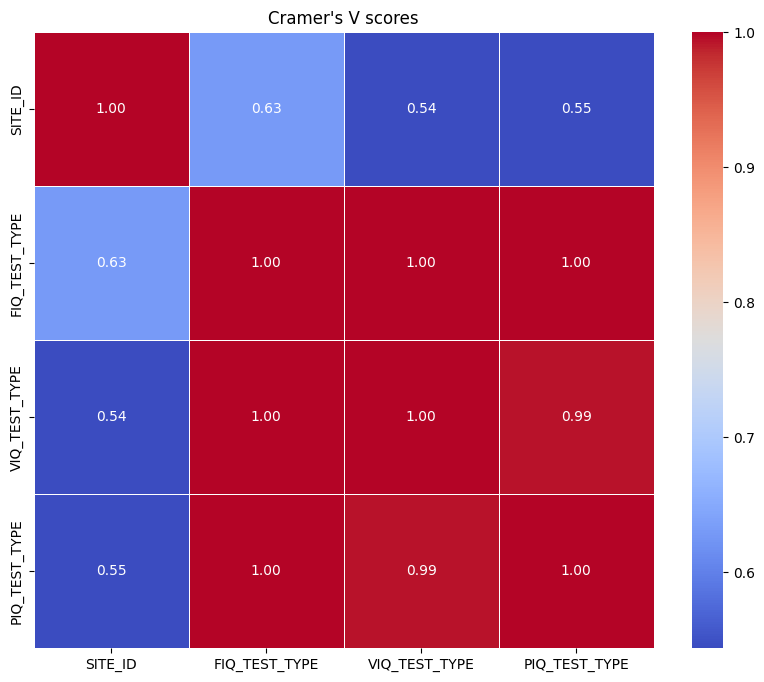

In [51]:
numeric_columns, categorical_columns, ASD_phenotypic_normalized = of.select_columns(ASD_phenotypic_normalized)
# Compute Cramer's V for every pair of features
cramer_v_scores = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for feature1 in categorical_columns:
    for feature2 in categorical_columns:
        cramer_v = of.cramers_v(ASD_phenotypic_normalized[feature1], ASD_phenotypic_normalized[feature2])
        cramer_v_scores.loc[feature1, feature2] = cramer_v

# Plot heatmap of Cramer's V scores
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_v_scores.astype(float), 
            annot=True, 
            linewidths=.5, 
            fmt='.2f',
            cmap="coolwarm")
plt.title("Cramer's V scores")
plt.show()


It seems that the information contained in VIQ_TEST_TYPE and PIQ_TEST_TYPE is almost the same, so it's reasonable to delete one of them. We decide to drop VIQ_TEST_TYPE and minimize the correlation between test types.

### Visual "correlation" between Categorical and Numerical Features

in order to evaluate eventual correlation

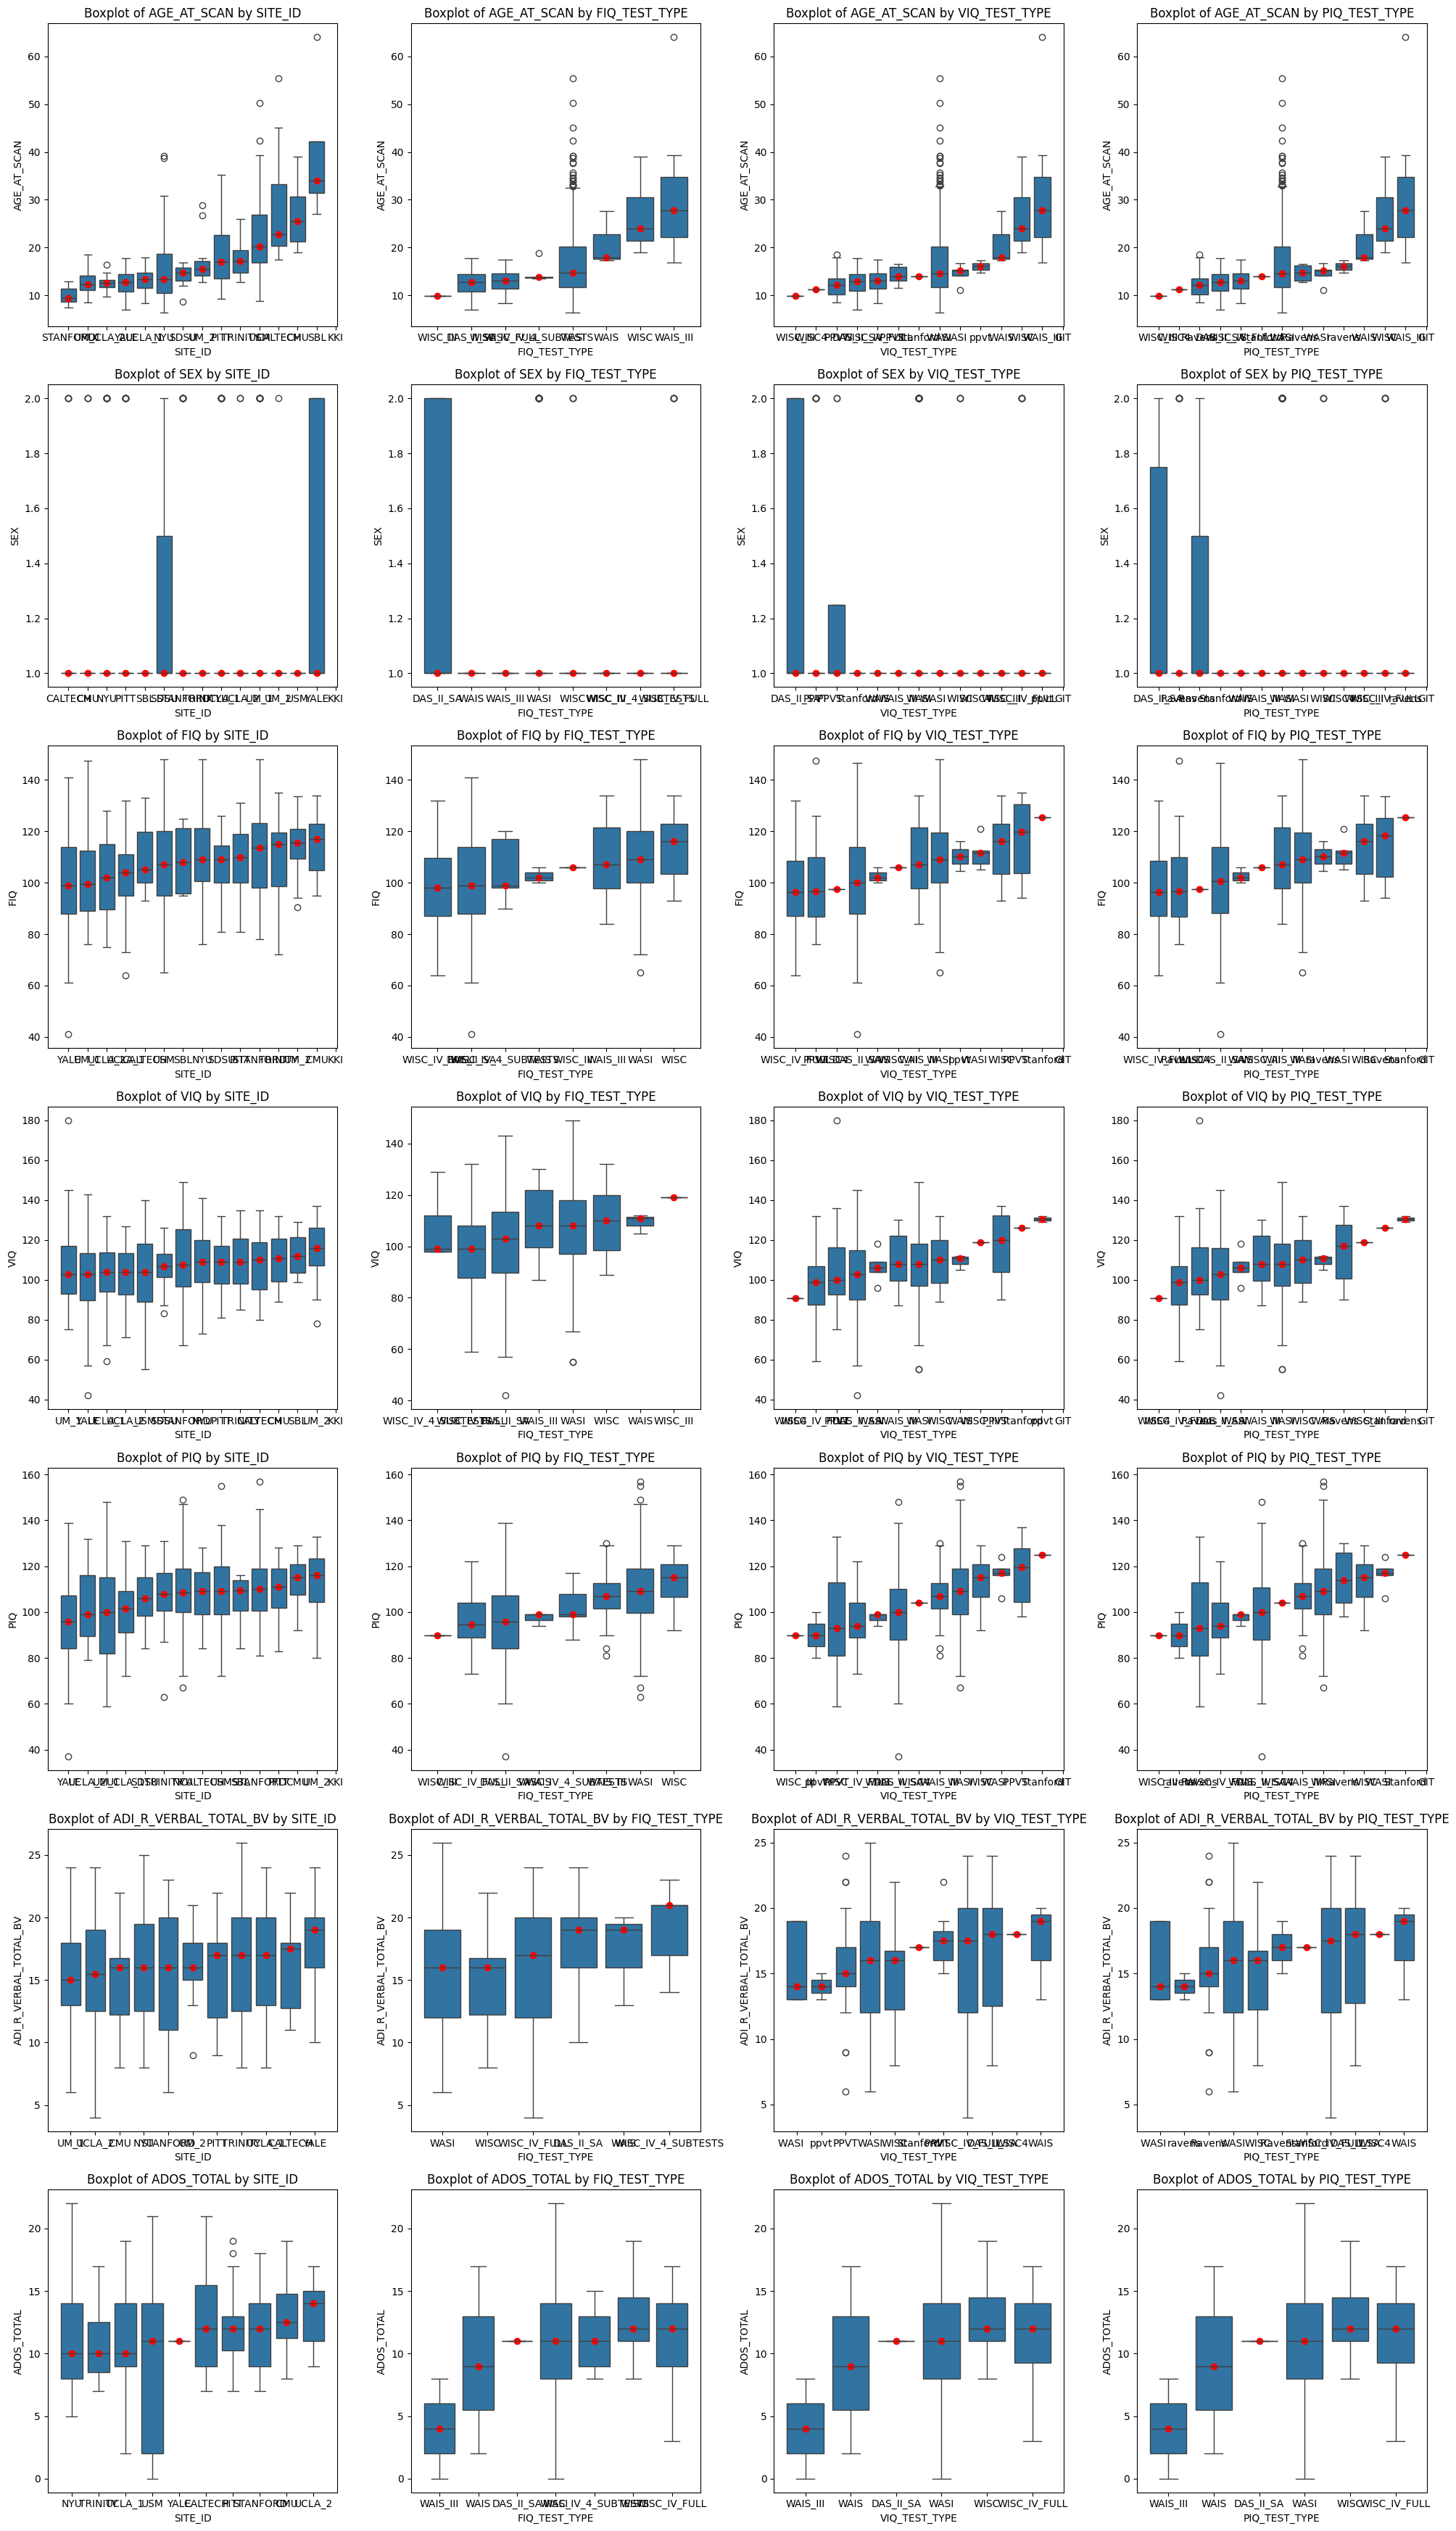

In [52]:

numeric_columns, categorical_columns, ASD_phenotypic= of.select_columns(ASD_phenotypic)

# Number of plots per row
plots_per_row = 4
num_plots = len(numeric_columns) * len(categorical_columns)
num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

plot_idx = 0
for numeric_col in numeric_columns:
    for cat_col in categorical_columns:
        ax = axes[plot_idx]
        
        sns.boxplot(x=cat_col, y=numeric_col, data=ASD_phenotypic,
                    order=ASD_phenotypic_normalized.groupby(cat_col, observed=False)[numeric_col].median().sort_values().index, ax=ax)
        
        # Highlight the median in red
        median = ASD_phenotypic.groupby(cat_col, observed=False)[numeric_col].median().sort_values()
        for i in range(len(median)):
            ax.plot(i, median.iloc[i], 'ro')
        
        ax.set_title(f'Boxplot of {numeric_col} by {cat_col}')
        ax.set_xlabel(cat_col)
        ax.set_ylabel(numeric_col)
        
        plot_idx += 1

# Remove any empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



We perform correlation analysis separatamente, per numeriche e categoriche così da eliminarne alcune. Poi o ANOVA TEST O BOX PLOT O CAPIAMO PER TROVARE EVENTUALE CORRELAZIONE TRA NUMERICHE E CATEGORICHE.

#  DATA PREPROCESSING

First of all, in order to avoid mismatch between attributes that are the same, but wrote with upper or lower characters, we decide to unify them.

In [ ]:
#We make all the caracters upper for all the categorical features
category_columns_upper = ASD_phenotypic.select_dtypes(include='category').apply(lambda x: x.str.upper())

#We now modify them in the dataset
ASD_phenotypic[category_columns_upper.columns] = category_columns_upper

In [ ]:
numeric_columns, categorical_columns, ASD_phenotypic = of.select_columns(ASD_phenotypic)


In [ ]:
# We obtain the names of the features 
categorical_column_names = categorical_columns.tolist()
categorical_column_names

['SITE_ID', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE']

### SITE_ID

SITE_ID refers to the place where the data from the subject was recluted. 


In [ ]:
# Accesso a una specifica colonna categorica utilizzando la lista di nomi
specific_category_column = ASD_phenotypic[categorical_column_names[0]].value_counts(dropna=False)
specific_category_column


SITE_ID
NYU         152
USM         101
UCLA_1       82
PITT         57
YALE         56
UM_1         53
STANFORD     40
UCLA_2       27
SDSU         23
TRINITY      23
CALTECH      18
UM_2         18
CMU          14
SBL           4
Name: count, dtype: int64

There is data that has been collected from the same center that we decide to unify.

In [ ]:
# We create a function to replace the categories for the indicated cases

def replace_categories(category):
    if "UCLA" in category:
        return "UCLA"
    if "LEUVEN" in category:
        return "LEUVEN"
    if "UM" in category:
        return "UM"
    else:
        return category

# Then we apply the replace function
ASD_phenotypic[categorical_column_names[0]] = ASD_phenotypic[categorical_column_names[0]].apply(replace_categories).astype('category')

# Now we check the new order
specific_category_column = ASD_phenotypic[categorical_column_names[0]].value_counts(dropna=False)
specific_category_column

SITE_ID
NYU         152
UCLA        109
USM         101
UM           71
PITT         57
YALE         56
STANFORD     40
SDSU         23
TRINITY      23
CALTECH      18
CMU          14
SBL           4
Name: count, dtype: int64

### FIQ_TEST_TYPE, VIQ_TEST_TYPE and PIQ_TEST_TYPE

FIQ_TEST_TYPE, VIQ_TEST_TYPE and PIQ_TEST_TYPE refers to the type of test that each center chose to get the information of FIQ_TEST, VIQ_TEST and PIQ_TEST respectively. As we want our clustering algorithm to be as most general as possible, we want to be able to categorize subjects in despise of the test used by the centers to get the data. So we decide to drop this feature as well.

Note that if in a future we will be interested in to analyze if there are differences between the clustering score obtained using the result for each difference test we'll can retrieve the information opportunely.

In [ ]:
for i in range (1,4):
    specific_category_column = ASD_phenotypic[categorical_column_names[i]].value_counts(dropna=False)
    print(specific_category_column)
    print('______________________________________\n')

FIQ_TEST_TYPE
WASI                  460
NaN                    66
DAS_II_SA              56
WISC_IV_FULL           48
WISC                   15
WAIS_III               14
WISC_IV_4_SUBTESTS      5
WAIS                    3
WISC_III                1
Name: count, dtype: int64
______________________________________

VIQ_TEST_TYPE
WASI            443
DAS_II_SA        69
WISC_IV_FULL     47
PPVT             38
NaN              23
WISC             15
WAIS_III         14
PPVT              8
WASI              5
WAIS              3
STANFORD          1
WISC4             1
WISC_III          1
Name: count, dtype: int64
______________________________________

PIQ_TEST_TYPE
WASI            443
DAS_II_SA        70
WISC_IV_FULL     47
RAVENS           38
NaN              23
WISC             15
WAIS_III         14
RAVENS            7
WASI              5
WAIS              3
STANFORD          1
WISC4             1
WISC_III          1
Name: count, dtype: int64
______________________________________



In [ ]:
# We create a function to replace the categories for the indicated cases

def replace_categories(category):
    if pd.isna(category):  # Controlla se il valore è NaN
        return category  # Se è NaN, restituisci lo stesso valore
    if "WASI" in category:
        return "WASI"
    if "WISC" in category:
        return "WISC"
    if "WAIS" in category:
        return "WAIS"
    if "DAS" in category:
        return "DAS"
    if "HAWIK" in category:
        return "HAWIK"
    if "PPVT" in category:
        return "PPVT"
    if "RAVENS" in category:
        return "RAVENS"
   
    else:
        return category

for i in range (1,4):
    ASD_phenotypic[categorical_column_names[i]] = ASD_phenotypic[categorical_column_names[i]].apply(replace_categories).astype('category')
    specific_category_column = ASD_phenotypic[categorical_column_names[i]].value_counts(dropna=False)
    print(specific_category_column)
    print('______________________________________\n')


FIQ_TEST_TYPE
WASI    460
WISC     69
NaN      66
DAS      56
WAIS     17
Name: count, dtype: int64
______________________________________

VIQ_TEST_TYPE
WASI        448
DAS          69
WISC         64
PPVT         46
NaN          23
WAIS         17
STANFORD      1
Name: count, dtype: int64
______________________________________

PIQ_TEST_TYPE
WASI        448
DAS          70
WISC         64
RAVENS       45
NaN          23
WAIS         17
STANFORD      1
Name: count, dtype: int64
______________________________________



## Managing Missing Values

Now we are going to fullfill the missing values for all the features, based on an analysis of the information delivered by each one.

### IQ Test Type

We use features FIQ, VIQ and PIQ in order to fill some values in FIQ-TEST-TYPE, VIQ-TEST-TYPE, PIQ-TEST-TYPE.
Since the presence of more missing values in "Type" features, we make a comparison for each couple of features. For instance: if for FIQ there is a value and for FIQ-TEST-TYPE there is a missing one, we fill it with the MODE.

In [ ]:
# Lista delle coppie di features da controllare
feature_pairs = [
    ('FIQ_TEST_TYPE', 'FIQ'),
    ('PIQ_TEST_TYPE', 'PIQ'),
    ('VIQ_TEST_TYPE', 'VIQ')]

# Iteriamo su ogni coppia di features
for test_type_col, score_col in feature_pairs:
    # Iteriamo su ogni riga del DataFrame
    for index, row in ASD_phenotypic.iterrows():
        # Controlliamo se il valore nella colonna 'test_type_col' è mancante
        if pd.isnull(row[test_type_col]):
            # Se il valore nella colonna 'score_col' è presente
            if not pd.isnull(row[score_col]):
                # Calcoliamo la moda di 'test_type_col'
                mode_test_type = ASD_phenotypic[test_type_col].mode()[0]
                # Sostituiamo il valore mancante nella colonna 'test_type_col' con la moda
                ASD_phenotypic.at[index, test_type_col] = mode_test_type
            # Se entrambi i valori in 'test_type_col' e 'score_col' sono mancanti
            elif pd.isnull(row[score_col]):
                # Verifichiamo se "NOT_AVAILABLE" è già presente tra le categorie della colonna
                if "NOT_AVAILABLE" not in ASD_phenotypic[test_type_col].cat.categories:
                    # Aggiungiamo "NOT_AVAILABLE" come nuova categoria
                    ASD_phenotypic[test_type_col] = ASD_phenotypic[test_type_col].cat.add_categories("NOT_AVAILABLE")
                # Assegniamo la categoria 'NOT_AVAILABLE' a 'test_type_col'
                ASD_phenotypic.at[index, test_type_col] = 'NOT_AVAILABLE'


### Test Scores

##### Data Standarization

Before starting to fill the missing values, we note that as the data for the variables FIQ, VIQ, PIQ was obtained with different tests, there are also different scales for the scores to take into account. In this way, we prefer to apply a standardization so we have all the score on the same scale.


In [ ]:
#For FIQ, the score scale is between 30-170 if the test taken was "DAS", otherwise is 50-160.
#We will unify all the data to the larger scale, i.e. 50-160

# We start defining the condition
condition = (ASD_phenotypic['FIQ_TEST_TYPE'] == 'DAS') | (ASD_phenotypic['FIQ'] < 50) | (ASD_phenotypic['FIQ'] > 160)

# Then we standarize the values dictated by the condition, to the new scale
ASD_phenotypic['FIQ'] = np.where(condition, 
                        (ASD_phenotypic['FIQ'] - 30) / (170 - 30) * (160 - 50) + 50, 
                        ASD_phenotypic['FIQ'])

In [ ]:
#For VIQ, the score scale is between 31-169 if the test taken was "DAS", 
#between 36-164 if the test taken was "STANFORD",
 #between 40-160 if the test taken was "PPVT",  otherwise is 50-160.
#We will unify all the data to the more common used scale, i.e. 50-160

for i in ASD_phenotypic.index:
    test_type = ASD_phenotypic['VIQ_TEST_TYPE'][i]
    current_value = ASD_phenotypic['VIQ'][i]
    if (test_type == 'DAS') or (current_value <36) or (current_value > 164):
        ASD_phenotypic.loc[i, 'VIQ'] = (current_value - 31) / (169 - 31) * (160 - 50) + 50
    elif (test_type == 'STANFORD') or (current_value <40) or (current_value > 160):
        ASD_phenotypic.loc[i, 'VIQ'] = (current_value - 36) / (164 - 36) * (160 - 50) + 50
    elif (test_type == 'PPVT') or (current_value <50) or (current_value > 160):
        ASD_phenotypic.loc[i, 'VIQ'] = (current_value - 40) / (160 - 40) * (160 - 50) + 50


In [ ]:
#For PIQ, the score scale is between 31-166 if the test taken was "DAS", 
#between 36-164 if the test taken was "STANFORD",
 #between 50-160 if the test taken was "RAVENS",  otherwise is 53-160.
#We will unify all the data to the more common used scale,, i.e. 50-160

for i in ASD_phenotypic.index:
    test_type = ASD_phenotypic['PIQ_TEST_TYPE'][i]
    current_value = ASD_phenotypic['PIQ'][i]
    if (test_type == 'DAS') or (current_value <36) or (current_value > 164):
        ASD_phenotypic.loc[i, 'VIQ'] = (current_value - 31) / (166 - 31) * (160 - 50) + 50
    elif (test_type == 'STANFORD') or (current_value <50) or (current_value > 160):
        ASD_phenotypic.loc[i, 'VIQ'] = (current_value - 36) / (164 - 36) * (160 - 50) + 50


In [ ]:
ASD_phenotypic.describe()

,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL
count,668.000000,668.000000,667.000000,668.000000,668.000000,317.000000,331.000000
mean,16.276463,1.118263,107.531913,106.976190,106.287425,16.059937,10.888218
std,7.183633,0.323162,15.338886,15.782631,16.113020,4.262681,4.760591
min,6.470000,1.000000,58.642857,54.888889,37.000000,4.000000,0.000000
25%,11.658575,1.000000,97.000000,97.000000,96.000000,13.000000,8.000000
50%,14.260000,1.000000,107.500000,108.000000,107.000000,16.000000,11.000000
75%,18.495100,1.000000,119.000000,118.000000,118.000000,19.000000,14.000000
max,64.000000,2.000000,148.000000,168.768116,157.000000,26.000000,22.000000


### ADOS_TOTAL

The feature "ADOS_TOTAL" is simply the sum of the scores obtained by "ADOS_COMM" and "ADOS_SOCIAL", so we can reduce the amount of missing values using the values of those features.

In [ ]:
# Replace -9999 and "-9999" with NaN
ASD_phenotypic_original["ADOS_COMM"] = ASD_phenotypic_original["ADOS_COMM"].replace(['-9999', -9999], np.NaN)
ASD_phenotypic_original["ADOS_SOCIAL"] = ASD_phenotypic_original["ADOS_SOCIAL"].replace(['-9999', -9999], np.NaN)

for i in ASD_phenotypic["ADOS_TOTAL"].index:
    ados_comm = ASD_phenotypic_original["ADOS_COMM"][i]
    ados_social = ASD_phenotypic_original["ADOS_SOCIAL"][i]
    if not pd.isna(ados_comm) and not pd.isna(ados_social):
        ASD_phenotypic.loc[i, "ADOS_TOTAL"] = ados_comm + ados_social
    

#### Test scores filling

We decided that to fill the missing values of the test subministred
it should be good to rely on the standard score achieved by the mean
of the global population (if the statistics are available in the literature) or the cutoff for the diagnostic of ASD,
otherwise we will use the mean extracted from our dataset.

So for the features "FIQ", "VIQ", "PIQ", "ADOS_TOTAL", "ADI_R_VERBAL_TOTAL_BV", we will apply a custom function that checks if there is an available value in literature for the mundial mean, otherwise assign the mean of the feature.


In [ ]:
#list of features that we want to fill
test_score_fatures = ["FIQ", "VIQ", "PIQ", "ADOS_TOTAL", "ADI_R_VERBAL_TOTAL_BV"]

#function to fill with the global mean or the data feature mean
def test_score_fill (feature_value, feature_name, feature_mean):
    # We create a dictionary to store the literature mean scores
    literature_scores = {
    "FIQ": list(range(95, 100)), # EEUU, mean score retrieved from https://www.worlddata.info/iq-by-country.php
    "VIQ": list(range(95, 100)), # EEUU, mean score retrieved from https://www.worlddata.info/iq-by-country.php
    "PIQ": list(range(95, 100)), # EEUU, mean score retrieved from https://www.worlddata.info/iq-by-country.php
    "ADOS_TOTAL": list(range(6, 12)), # autism cutoff retrieved from https://www.researchgate.net/figure/ADOS-maximum-score-and-cut-off-points-for-ASD-15_tbl1_361212648
    "ADI_R_VERBAL_TOTAL_BV": list(range(7, 10)), # autism cutoff retrieved from https://www.researchgate.net/figure/Summary-statistics-for-ADI-R-domain-scores_tbl4_6709395
    }

    # Then we check which feature we obtained to decide if replace
    # using the value in the dictionary ot directly the mean of the data
    if pd.isna(feature_value):

        if feature_name in literature_scores:
            return random.choice(literature_scores[feature_name])
        else:
            return feature_mean
    else:

        return feature_value

#loop for filling the features   
for feature_name in test_score_fatures:
    feature_mean = ASD_phenotypic_original[feature_name].mean()
    ASD_phenotypic[feature_name] = ASD_phenotypic[feature_name].apply(test_score_fill, args=(feature_name, feature_mean))


In [ ]:
ASD_phenotypic.describe()

,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,ADI_R_VERBAL_TOTAL_BV,ADOS_TOTAL
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,16.276463,1.118263,107.519140,106.976190,106.287425,11.832335,9.696108
std,7.183633,0.323162,15.330938,15.782631,16.113020,5.012312,3.750724
min,6.470000,1.000000,58.642857,54.888889,37.000000,4.000000,0.000000
25%,11.658575,1.000000,97.000000,97.000000,96.000000,8.000000,7.000000
50%,14.260000,1.000000,107.428571,108.000000,107.000000,9.000000,9.000000
75%,18.495100,1.000000,119.000000,118.000000,118.000000,16.000000,11.000000
max,64.000000,2.000000,148.000000,168.768116,157.000000,26.000000,22.000000


We can see, that if we display the information of the dataset, we have no longer presence of missing values.

In [ ]:

ASD_phenotypic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 1111
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   SITE_ID                668 non-null    category
 1   AGE_AT_SCAN            668 non-null    float64 
 2   SEX                    668 non-null    int64   
 3   FIQ                    668 non-null    float64 
 4   VIQ                    668 non-null    float64 
 5   PIQ                    668 non-null    float64 
 6   FIQ_TEST_TYPE          668 non-null    category
 7   VIQ_TEST_TYPE          668 non-null    category
 8   PIQ_TEST_TYPE          668 non-null    category
 9   ADI_R_VERBAL_TOTAL_BV  668 non-null    float64 
 10  ADOS_TOTAL             668 non-null    float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 61.5 KB


# Data distribution

We want to check how our features are distributed, in order to know which kind of normalization of the data is more suitable and if we may need to delete outliers.

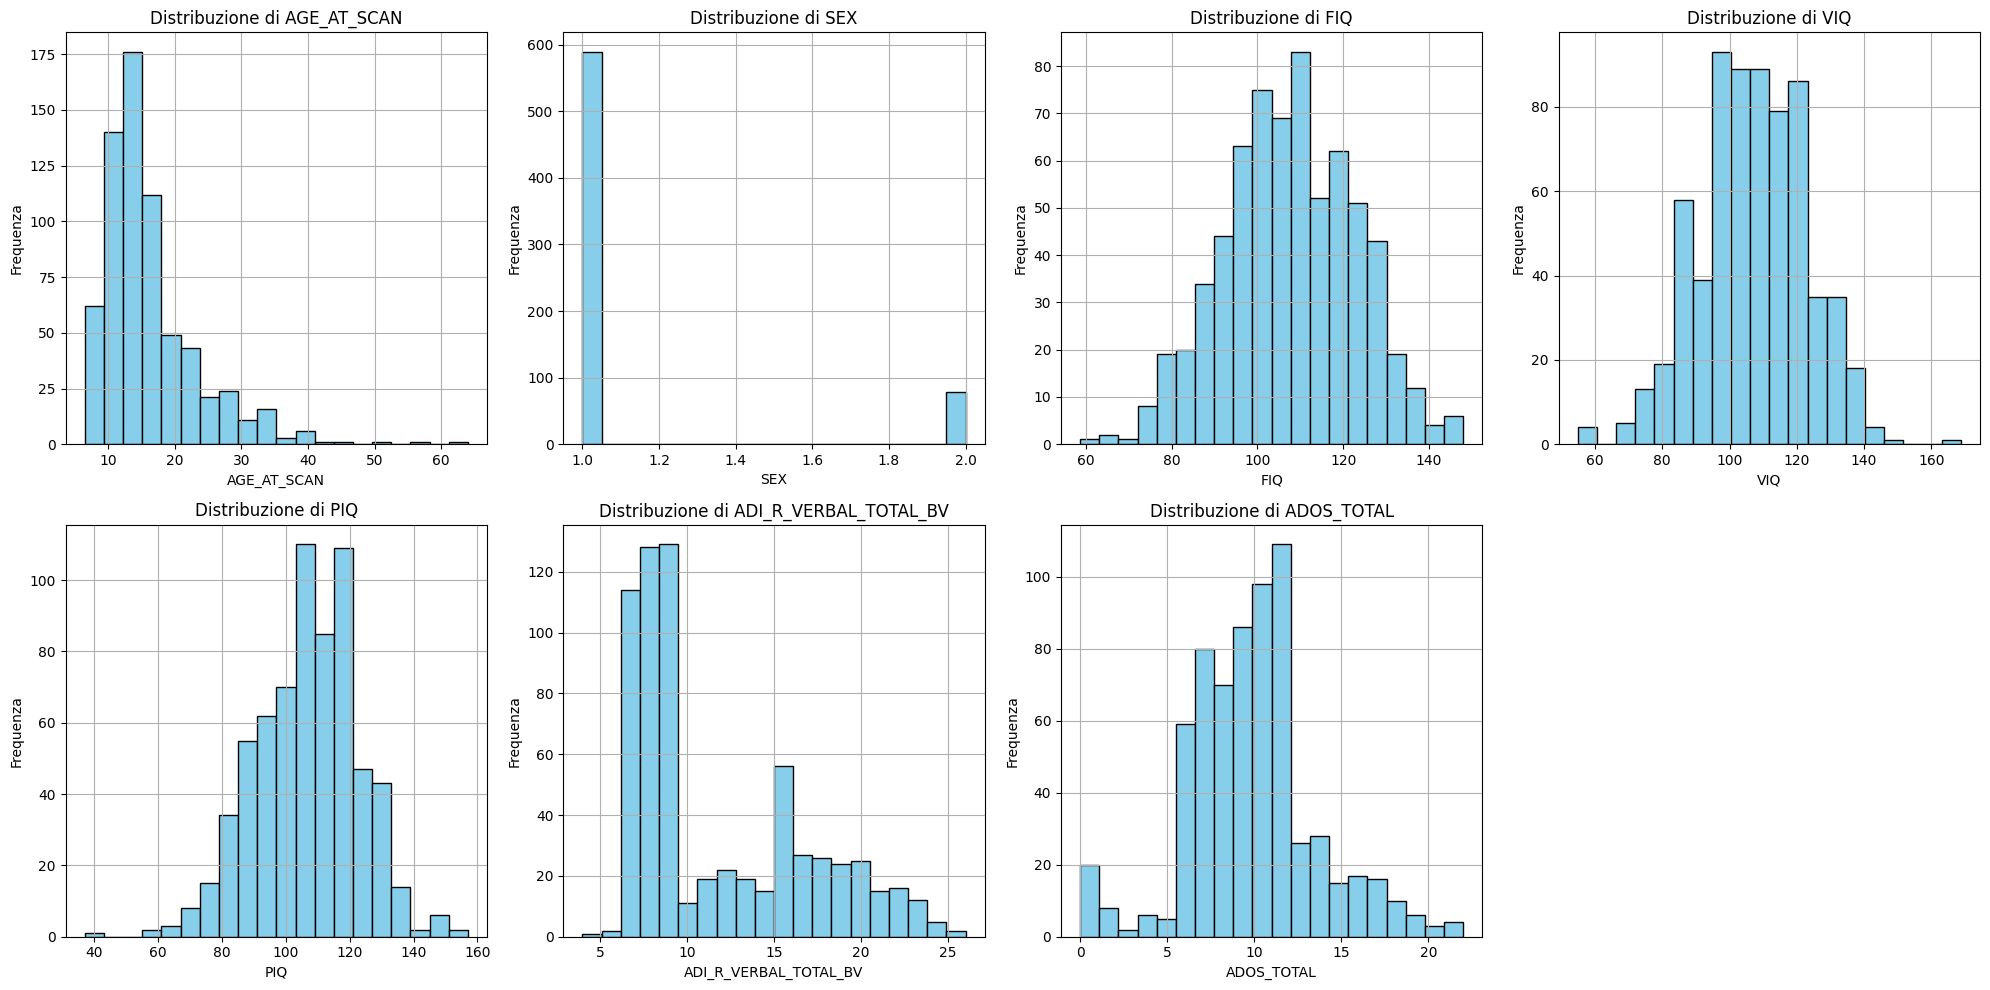

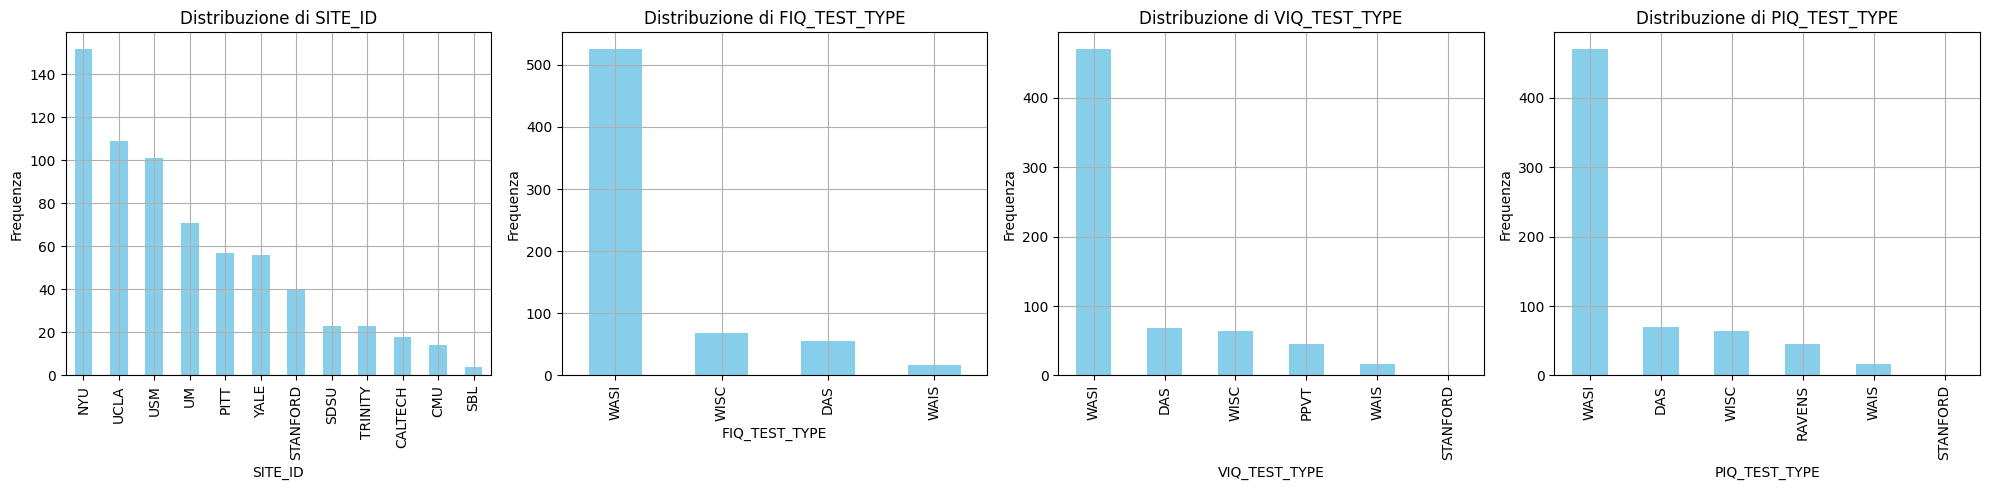

In [ ]:
# Utilizzo della funzione per plottare le distribuzioni delle features
of.plot_distributions(ASD_phenotypic)

# PRE PROCESSED DATA STORAGE

In [ ]:

# We decide to store in a file .csv the pre-processed dataset
ASD_phenotypic.to_csv('DataSets/Phenotypic Datasets/ASD_phenotypic_preprocessed.csv', index=False)
# And also the diagnostic groups
ASD_clinical.to_csv('DataSets/Phenotypic Datasets/ASD_clinical.csv', index=False)
